## 准备

In [6]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# 决策边界函数
#from matplotlib.colors import ListedColormap
def decision_boundary_regression(clf, X, y, axis=[0,2.5,0,20], xlabel="x", ylabel="y", style="r-",
                                 plot_training = True, data_style="b.", title="decision_boundary"):
    if plot_training:
        plt.plot(X, y, data_style)
    
    x1 = np.linspace(axis[0], axis[1], 100).reshape(-1,1)
    y1 = clf.predict(x1)
    plt.plot(x1, y1, style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis(axis)
    plt.title(title)

## 构造数据

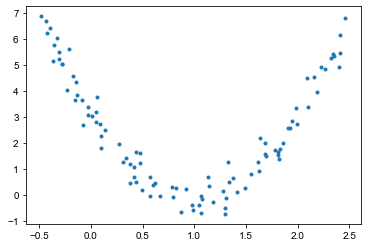

In [5]:
np.random.seed(42)
X = np.random.rand(100,1)*3 - 0.5
y = 3 * (X.flatten() - 1)**2 + 0.5 * np.random.randn(100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
plt.plot(X,y,'.')

## 训练 
-- 测试最优 n_estimators

### 手动测试

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth = 2,
    learning_rate=0.05,
    warm_start=True,
    
    random_state=0,
)

n_estimators = 500

"""
在 0 - n_estimators 之间的数字赋值给gbrt 中的 n_estimators，计算每次的 error，
当 error 随着模型个数开始上升时(以五次为标准)停止测试
"""
min_error = float('inf')
count = 0 # 计数器，当 mean_square_error 随着 n_estimators 连续上升 n 次后停止迭代
for i in range(n_estimators):
    gbrt.n_estimators = i+1
    gbrt.fit(X_train, y_train)
    
    error = mean_squared_error(y_test,gbrt.predict(X_test))
    if error < min_error:
        min_error = error
        count = 0
    else:
        count += 1
        if count == 5:
            break

In [21]:
# 最优 n_estimators 
gbrt.n_estimators, gbrt.n_estimators_ # 前者是赋值的数量，后者是实际的数量

(140, 140)

### 内置函数测试

In [37]:
gbrt = GradientBoostingRegressor(
    max_depth = 2,
    learning_rate=0.05,
    n_estimators=500,

    loss="squared_error",
    validation_fraction=0.25,
    n_iter_no_change=5,
    random_state=0,
)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=5, random_state=0,
                          validation_fraction=0.25)

In [41]:
# 因为验证集的不同，和手动的有区别
gbrt.n_estimators, gbrt.n_estimators_,len(gbrt.train_score_)

(500, 117, 117)

## 绘制 error 变化曲线

In [53]:
gbrt = GradientBoostingRegressor(
    max_depth = 2,
    learning_rate=0.05,
    n_estimators=500,
    
    loss=mean_squared_error,
    random_state=0,
)
gbrt.fit(X_train, y_train)

errors_training = gbrt.train_score_
errors_testing = [mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(X_test)]
len(errors_training), len(errors_testing)

(500, 500)

(0.0, 500.0, 0.0, 0.5)

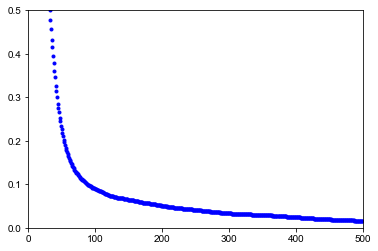

In [54]:
plt.plot(errors_training,'b.')
plt.axis([0,500,0,0.5])
plt.title("training errors")

Text(0.5, 1.0, 'testing errors')

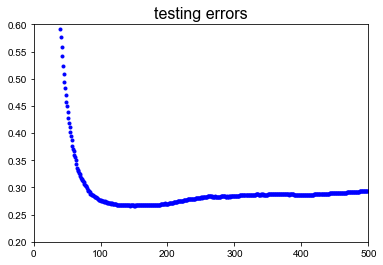

In [71]:
plt.plot(errors_testing,'b.')
plt.axis([0,500,0.20,0.6])
plt.title("testing errors")